# Лабораторная работа №2

---

## 1. Оценки математического ожидания, дисперсии, медианы

### Задание 1

Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью $f_\xi(x) = \theta^2 x e^{-\theta x}$. Для каждого $\theta \in \{0.5, 2, 8\}$:

**(a)** Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$. Привести в отчет.

**(b)** Для $k \in \{2^4, 2^5, \ldots, 2^{15}\}$ построить выборку из k элементов.  
   Для каждой из них посчитать оценки:
   - математического ожидания,
   - дисперсии,
   - квадрата математического ожидания параметра из варианта.

   Для каждой выборки и оценки визуализировать результаты на графиках (для каждой оценки — свой график).  
   По вертикальной оси — значение оценки, по горизонтальной — $k$.  
   Добавить горизонтальную линию с аналитическим значением оценки.

#### (a) Вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$

Дана плотность распределения:
$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \qquad x \ge 0.
$$

**Проверка гамма распределения**

Общая формула гамма-распределения с параметрами формы $k$ и интенсивности $\lambda$:

$$
f(x) = \frac{\lambda^k}{\Gamma(k)} x^{k-1} e^{-\lambda x}, \qquad x \ge 0.
$$

Сравним с данной плотностью:

$$
f_\xi(x)=\theta^2 x e^{-\theta x}.
$$

Приведём гамма-формулу к виду, похожему на нашу:

$$
\frac{\lambda^k}{\Gamma(k)} x^{k-1} e^{-\lambda x}.
$$

Подстановка:

- показатель степени при $x$:  

  $k - 1 = 1 \;\Rightarrow\; k = 2$  

- экспонента имеет параметр $\lambda = \theta$

- нормирующий множитель

$$
\Gamma(k) = 
\Gamma(2) = 
\int_0^\infty x^{1} e^{-x}\,dx 
= \left[-x e^{-x}\right]_0^\infty + \int_0^\infty e^{-x}\,dx
= 0 + 1 
= 1
$$

$$
\Gamma(2) = 1! = 1.
$$

$$
\Rightarrow \frac{\lambda^k}{\Gamma(k)} = \frac{\theta^2}{\Gamma(2)} = \theta^2
$$

После подстановки:

$$
f(x)=\theta^2 x^{2-1} e^{-\theta x} = \theta^2 x e^{-\theta x},
$$

что полностью совпадает с исходной плотностью.  

Следовательно,

$$
\xi \sim \Gamma(k=2,\ \lambda=\theta).
$$

**Аналитические характеристики гамма-распределения**

Для гамма-распределения $\Gamma(k,\lambda)$:

$$
E\xi = \frac{k}{\lambda},
\qquad
D\xi = \frac{k}{\lambda^2},
\qquad
E(\xi^2)=D\xi + (E\xi)^2.
$$

Подставляем $k = 2$ и $\lambda = \theta$:

$$
E\xi = \frac{2}{\theta},
\qquad
D\xi = \frac{2}{\theta^2},
\qquad
E(\xi^2)=\frac{6}{\theta^2}.
$$

In [92]:
import sympy as sp
import pandas as pd

# параметры
thetas = [0.5, 2, 8]

# символ
theta = sp.Symbol('ξ', positive=True)

E_x = 2/theta
D_x = 2/theta**2
E_x2 = 6/theta**2

rows = []
for t in thetas:
    rows.append([
        t,
        float(E_x.subs(theta, t)),
        float(D_x.subs(theta, t)),
        float(E_x2.subs(theta, t))
    ])

table = pd.DataFrame(rows, columns=["ξ", "E[x]", "D[x]", "E[x^2]"])
table

,ξ,E[x],D[x],E[x^2]
0,0.5,4.00,8.00000,24.00000
1,2.0,1.00,0.50000,1.50000
2,8.0,0.25,0.03125,0.09375


#### (b) Построить выборку из k ...

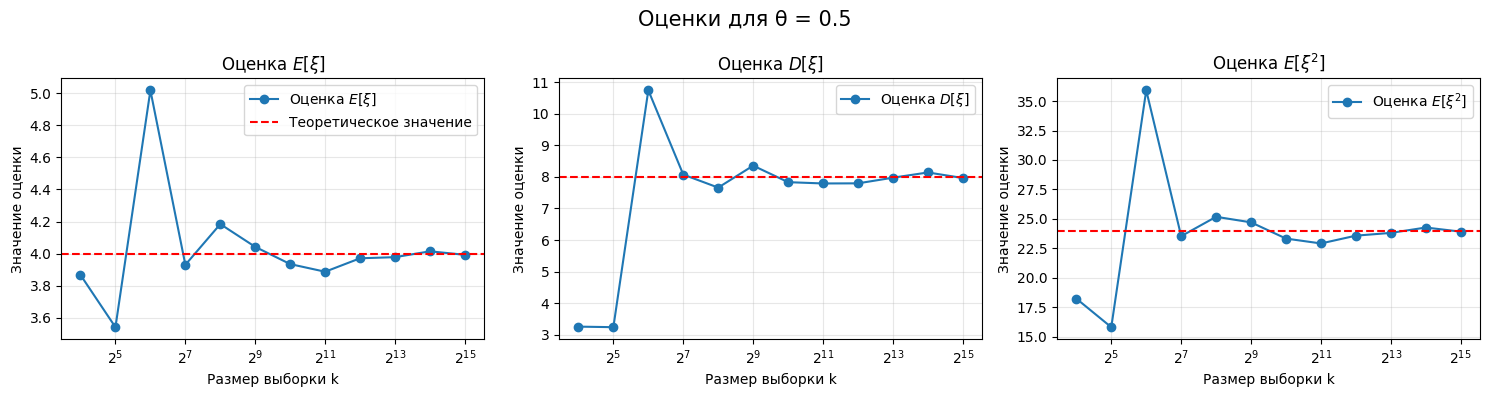

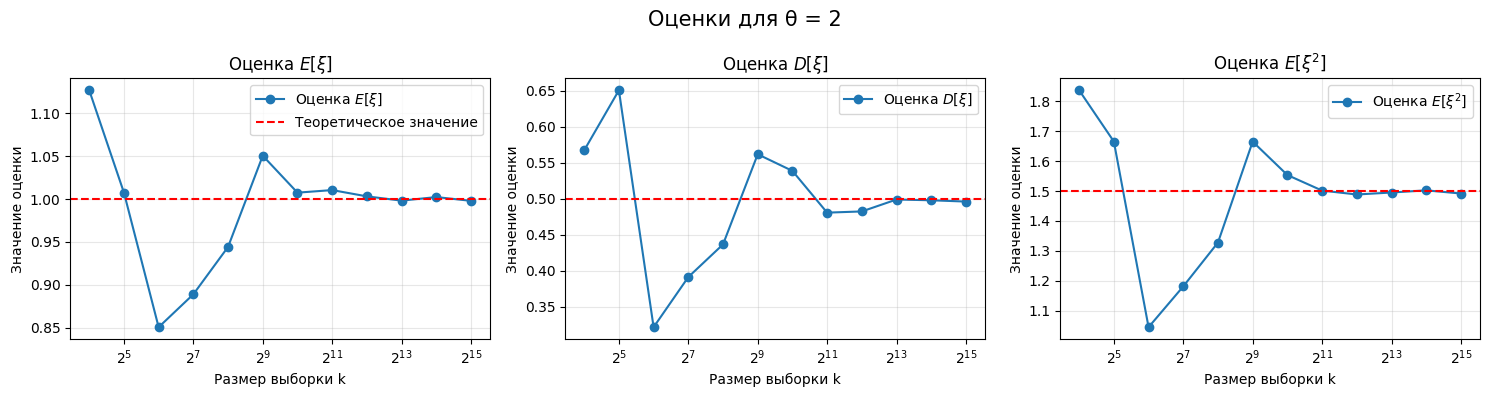

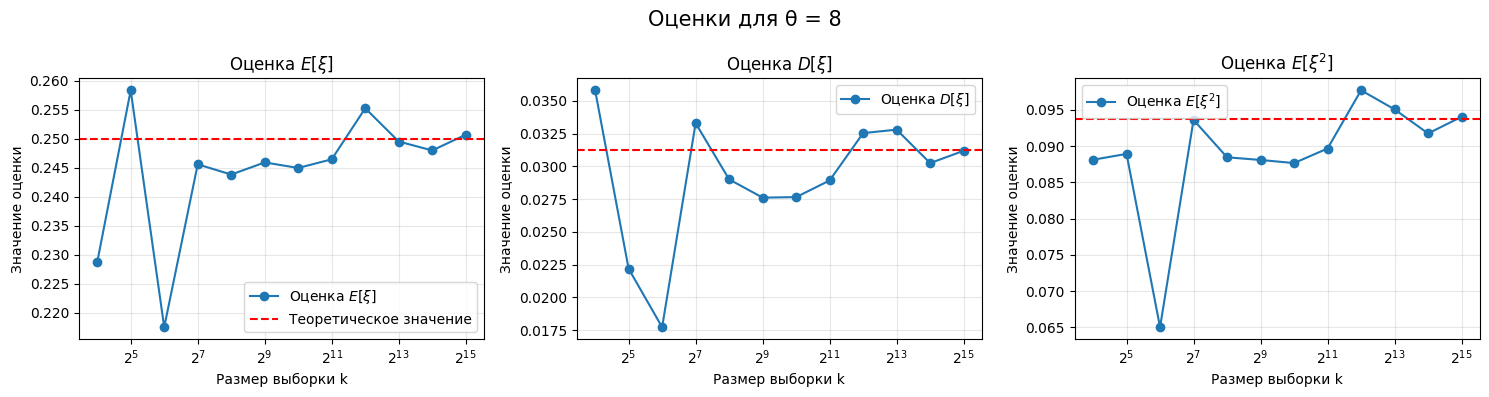

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# параметры
thetas = [0.5, 2, 8]
k_values = [2**i for i in range(4, 16)]  # 2^4 ... 2^15

# аналитические значения
def analytical_values(theta):
    E = 2/theta
    D = 2/theta**2
    E2 = 6/theta**2
    return E, D, E2

# оценка по выборке
def compute_estimates(sample):
    E_hat = np.mean(sample)
    D_hat = np.var(sample, ddof=0)
    E2_hat = np.mean(sample**2)
    return E_hat, D_hat, E2_hat

for theta in thetas:

    # аналитические значения
    E_true, D_true, E2_true = analytical_values(theta)

    est_E, est_D, est_E2 = [], [], []

    # распределение Gamma(k=2, scale=1/theta)
    dist = gamma(a=2, scale=1/theta)

    for k in k_values:
        sample = dist.rvs(size=k)
        E_hat, D_hat, E2_hat = compute_estimates(sample)

        est_E.append(E_hat)
        est_D.append(D_hat)
        est_E2.append(E2_hat)

    plt.figure(figsize=(15, 4))
    plt.suptitle(f'Оценки для θ = {theta}', fontsize=15)

    # 1. E[X]
    plt.subplot(1, 3, 1)
    plt.plot(k_values, est_E, 'o-', label='Оценка $E[\\xi]$')
    plt.axhline(E_true, color='red', linestyle='--', label='Теоретическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $E[\\xi]$')
    plt.grid(alpha=0.3)
    plt.legend()

    # 2. D[X]
    plt.subplot(1, 3, 2)
    plt.plot(k_values, est_D, 'o-', label='Оценка $D[\\xi]$')
    plt.axhline(D_true, color='red', linestyle='--')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $D[\\xi]$')
    plt.grid(alpha=0.3)
    plt.legend()

    # 3. E[X^2]
    plt.subplot(1, 3, 3)
    plt.plot(k_values, est_E2, 'o-', label='Оценка $E[\\xi^2]$')
    plt.axhline(E2_true, color='red', linestyle='--')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $E[\\xi^2]$')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

### Задание 2

Дана плотность распределения случайной величины ξ:

$$
f^{\lambda,a}_\xi(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \ge a, \\
0, & \text{иначе}.
\end{cases}
$$

Пусть $(\lambda, a) = (2, 2)$.

**(a)** Аналитически вычислить значение моды, математического ожидания и медианы.

**(b)** Создать две выборки: одну большого размера (например, 10000 наблюдений), вторую маленького размера (например, 20 наблюдений).  
   Построить оценки моды, математического ожидания и медианы.

**(c)**  
   - Для первой выборки построить гистограмму значений и нанести три вертикальные линии оценок моды, математического ожидания и медианы.  
   - Для второй выборки — то же самое.  
   - Построить дополнительный график для первой выборки: функция плотности и вертикальные линии аналитических значений моды, математического ожидания и медианы.  
   - То же самое сделать для второй выборки.

**(d)** Изменять размер выборки и изучить, например, сходится ли медиана к математическому ожиданию или нет.

#### (a) Аналитические вычисления

Дана плотность распределения:
$$
f_\xi(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \ge a,\\
0, & x < a,
\end{cases}
$$
при $(\lambda, a) = (2, 2)$.

Это сдвинутое экспоненциальное распределение:
$$
\xi = a + \eta, \qquad \eta \sim \mathrm{Exp}(\lambda).
$$

**Мода**  

Плотность убывает на $[a, \infty)$, поэтому максимум достигается в точке среза:
$$
\text{mode} = a = 2.
$$

**Математическое ожидание**  

Для экспоненты $E[\eta]=1/\lambda$, значит
$$
E[\xi] = a + \frac{1}{\lambda}
= 2 + \frac12 = 2.5.
$$

**Медиана**  

Так как распределение $\xi$ является сдвинутой экспонентой:
$$
\xi = a + \eta,\qquad \eta \sim \mathrm{Exp}(\lambda),
$$
то
$$
P(\xi \le m) = P(a + \eta \le m) = P(\eta \le m - a).
$$

Функция распределения экспоненты:
$$
P(\eta \le x) = 1 - e^{-\lambda x}.
$$

Подставляем $x = m - a$:

$$
P(\xi \le m) = 1 - e^{-\lambda(m-a)}.
$$

Теперь используем условие на медиану:

$$
P(\xi \le m)=0.5
\quad\Longrightarrow\quad
1 - e^{-\lambda(m-a)} = 0.5.
$$

$$
\Rightarrow
m = a + \frac{\ln 2}{\lambda}
= 2 + \frac{\ln 2}{2}
\approx 2.3466.
$$

**Итог:**
- мода: **2**  
- математическое ожидание: **2.5**  
- медиана: **≈ 2.3466**

#### (b) Создание двух выборок и вычисление оценок моды, мат. ожидания и медианы

Генерируем две выборки из распределения

$$
\xi = a + \eta, \qquad \eta \sim \mathrm{Exp}(\lambda),
$$

при $(\lambda, a) = (2, 2)$:

- большая выборка: 10000 наблюдений,
- маленькая выборка: 20 наблюдений.

Для каждой выборки вычисляем:

- **моду** (по максимальному столбцу гистограммы),

- **математическое ожидание** $\hat{E}[\xi] = \frac{1}{n}\sum x_i$,

- **медиану** $\hat{m} = \mathrm{median}(x_1,\ldots,x_n)$.

Выборочные оценки затем будут использованы в пункте (c) для построения графиков.


In [94]:
import numpy as np

lam = 2
a = 2

# генератор выборки: ξ = a + Exp(lam)
def sample_xi(n):
    return a + np.random.exponential(scale=1/lam, size=n)

# оценка моды через гистограмму
def estimate_mode(sample, bins=30):
    hist, edges = np.histogram(sample, bins=bins)
    i = np.argmax(hist)
    return (edges[i] + edges[i+1]) / 2

# вычисление всех оценок
def compute_estimates(sample):
    mode_hat = estimate_mode(sample)
    mean_hat = np.mean(sample)
    median_hat = np.median(sample)
    return mode_hat, mean_hat, median_hat

# две выборки
big_sample = sample_xi(10000)
small_sample = sample_xi(20)

# оценки
big_mode, big_mean, big_median = compute_estimates(big_sample)
small_mode, small_mean, small_median = compute_estimates(small_sample)

# аналитические значения
mode_true = a
mean_true = a + 1/lam
median_true = a + np.log(2)/lam

df = pd.DataFrame({
    "Характеристика": ["Мода", "Мат. ожидание", "Медиана"],
    "Аналитическое": [mode_true, mean_true, median_true],
    "Большая выборка": [big_mode, big_mean, big_median],
    "Малая выборка": [small_mode, small_mean, small_median],
})

df


,Характеристика,Аналитическое,Большая выборка,Малая выборка
0,Мода,2.000000,2.066773,2.041780
1,Мат. ожидание,2.500000,2.499300,2.483664
2,Медиана,2.346574,2.345350,2.434982


#### (c) Визуализация оценок: гистограммы и графики плотности

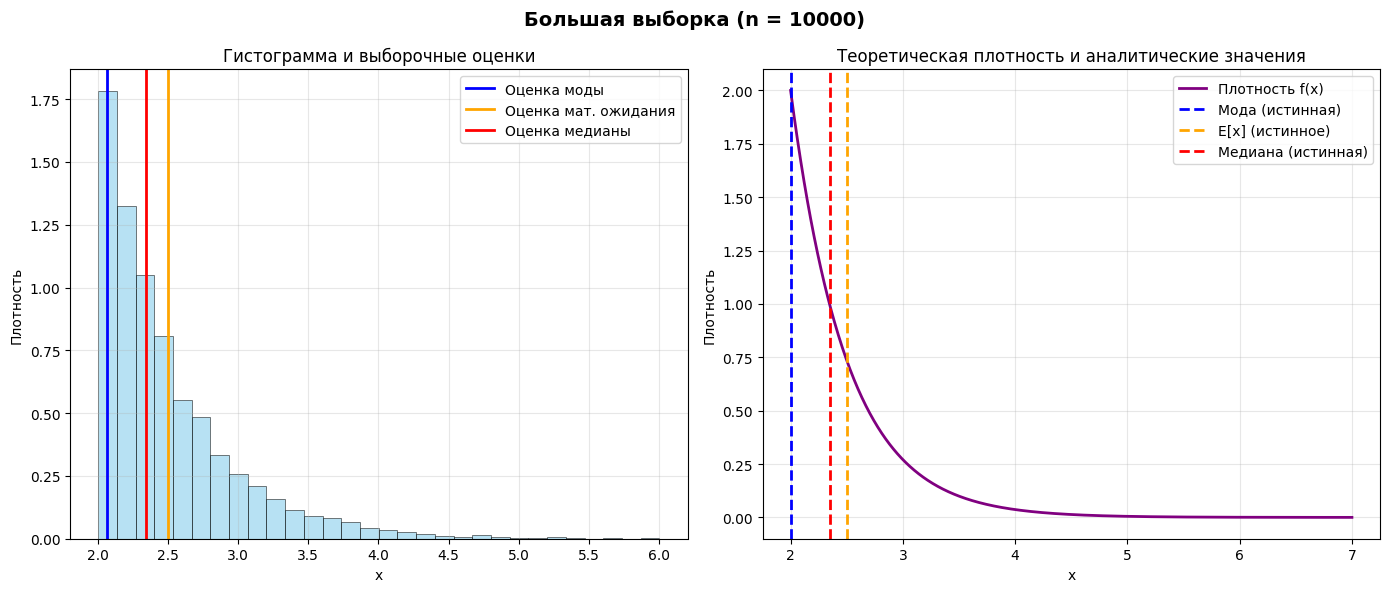

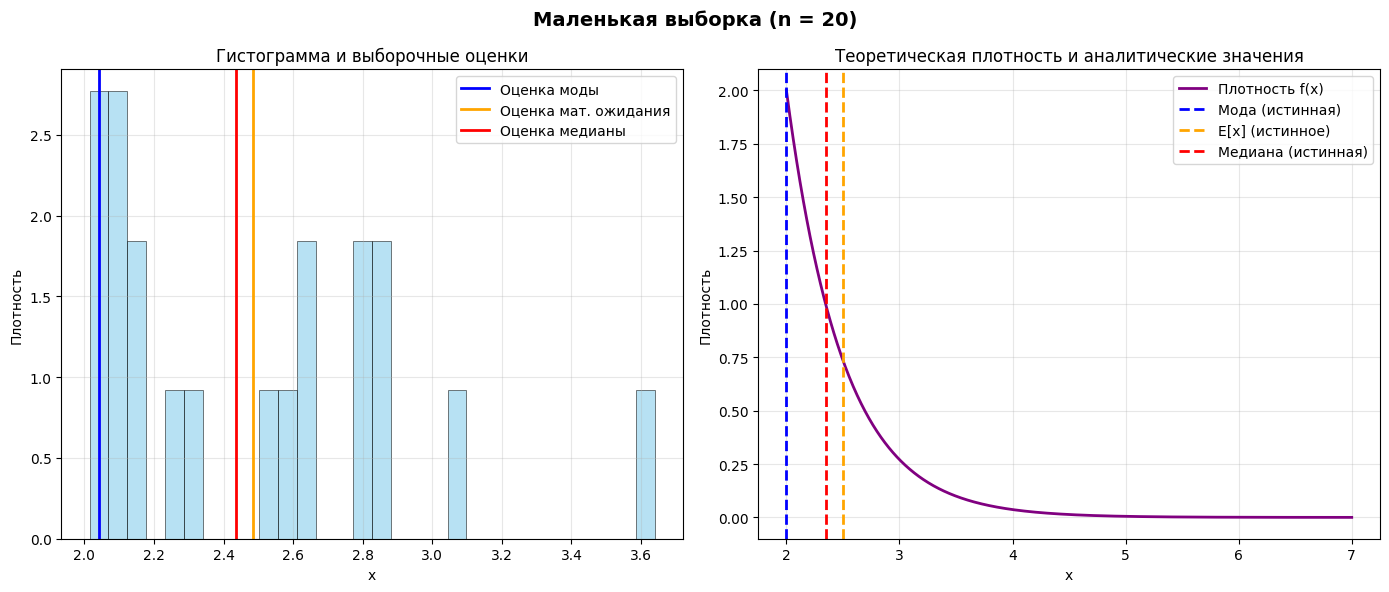

In [95]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2
a = 2

# аналитические значения
mode_true = a
mean_true = a + 1/lam
median_true = a + np.log(2)/lam

# плотность
def density(x):
    return lam * np.exp(-lam * (x - a))

color_hist = "skyblue"
color_mode = "blue"
color_mean = "orange"
color_median = "red"
color_density = "purple"


def plot_pair(sample, mode_hat, mean_hat, median_hat, title):
    x = np.linspace(a, a + 5, 1000)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=14, fontweight='bold')

    # гистограмма и выборочные линии
    axs[0].hist(
        sample, bins=30, density=True,
        alpha=0.6, color=color_hist,
        edgecolor="black", linewidth=0.6
    )

    axs[0].axvline(mode_hat,   color=color_mode,   linewidth=2, label='Оценка моды')
    axs[0].axvline(mean_hat,   color=color_mean,   linewidth=2, label='Оценка мат. ожидания')
    axs[0].axvline(median_hat, color=color_median, linewidth=2, label='Оценка медианы')

    axs[0].set_title("Гистограмма и выборочные оценки")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("Плотность")
    axs[0].grid(alpha=0.3)
    axs[0].legend()

    # плотность и аналитические линии
    axs[1].plot(x, density(x), color=color_density, linewidth=2, label="Плотность f(x)")

    axs[1].axvline(mode_true,   color=color_mode,   linestyle='--', linewidth=2, label="Мода (истинная)")
    axs[1].axvline(mean_true,   color=color_mean,   linestyle='--', linewidth=2, label="E[x] (истинное)")
    axs[1].axvline(median_true, color=color_median, linestyle='--', linewidth=2, label="Медиана (истинная)")

    axs[1].set_title("Теоретическая плотность и аналитические значения")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("Плотность")
    axs[1].grid(alpha=0.3)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_pair(
    big_sample,
    big_mode, big_mean, big_median,
    "Большая выборка (n = 10000)"
)

plot_pair(
    small_sample,
    small_mode, small_mean, small_median,
    "Маленькая выборка (n = 20)"
)

#### (d) Исследование сходимости медианы и математического ожидания

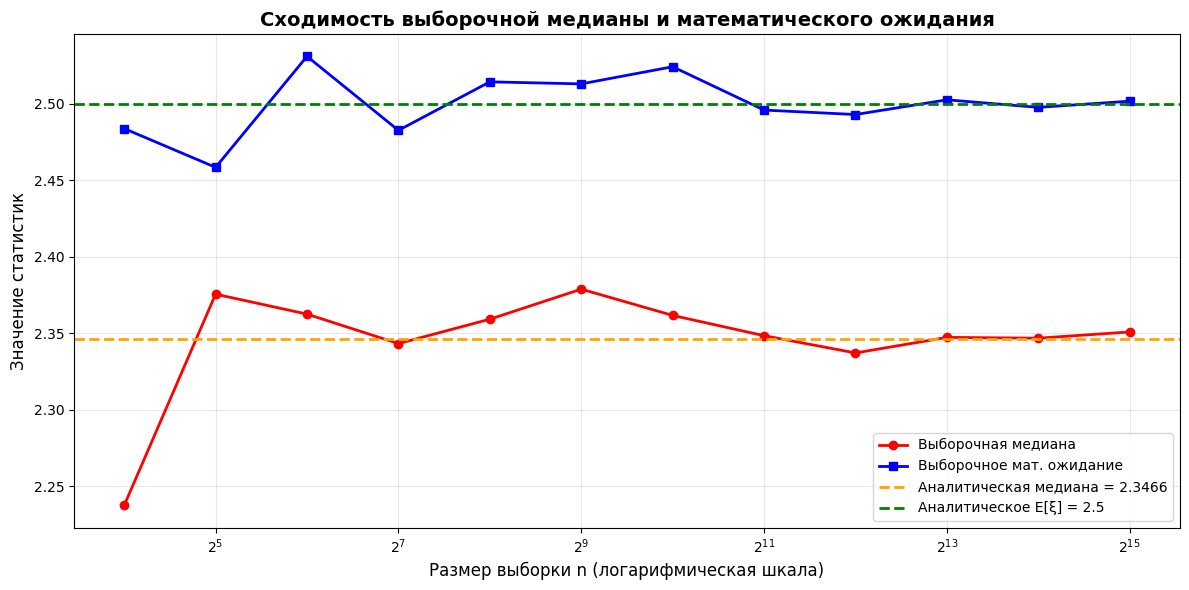

In [96]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2
a = 2

# аналитические значения
mean_true   = a + 1/lam
median_true = a + np.log(2)/lam

# размеры выборок
n_values = [2**k for k in range(4, 16)]

sample_medians = []
sample_means = []

for n in n_values:
    sample = a + np.random.exponential(scale=1/lam, size=n)
    sample_medians.append(np.median(sample))
    sample_means.append(np.mean(sample))

plt.figure(figsize=(12, 6))

# выборочные оценки
plt.plot(
    n_values, sample_medians, "o-", color="red",
    label="Выборочная медиана", linewidth=2, markersize=6
)
plt.plot(
    n_values, sample_means, "s-", color="blue",
    label="Выборочное мат. ожидание", linewidth=2, markersize=6
)

# аналитические линии
plt.axhline(
    median_true, color="orange", linestyle="--", linewidth=2,
    label=f"Аналитическая медиана = {median_true:.4f}"
)
plt.axhline(
    mean_true, color="green", linestyle="--", linewidth=2,
    label=f"Аналитическое E[ξ] = {mean_true}"
)

plt.xscale("log", base=2)
plt.xlabel("Размер выборки n (логарифмическая шкала)", fontsize=12)
plt.ylabel("Значение статистик", fontsize=12)
plt.title("Сходимость выборочной медианы и математического ожидания", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

**Медиана** стремится к своей аналитической медиане, а **математическое ожидание** - к своему аналитическому значению.

Так как медиана и среднее различаются для экспоненциального распределения, их выборочные оценки сходятся к разным пределам $\Rightarrow$ они не сходятся.

## 2. Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей:

| ξ \\ η | 1 | 2 | 3 | … |
|-------|---|---|---|---|
| -1    | $\frac{2}{5} \cdot \frac{1}{2^1}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | … |
| 0     | $\frac{1}{5} \cdot \frac{1}{2^1}$ | $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | … |
| 1     | $\frac{2}{5} \cdot \frac{1}{2^1}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | … |

где η принимает все значения из ℕ.

**Требуется:**  
Вычислить корреляционную матрицу:
- аналитически,
- приближённо (на основе моделирования).

#### Аналитическое решение

Совместное распределение задано:
$$
P(\xi=i,\eta=j)=c_i\cdot\frac{1}{2^j},
$$
где $i\in\{-1,0,1\}$, $j\in\mathbb{N}$, а коэффициенты
$$
c_{-1}=\frac25,\qquad c_0=\frac15,\qquad c_1=\frac25
$$
являются распределением случайной величины $\xi$.

**Проверка нормировки**

Сумма вероятностей по $j$ должна быть равна 1 для каждого $i$.  
Используем сумму геометрического ряда:
$$
\sum_{j=1}^{\infty}\frac{1}{2^j}=1.
$$

$$
\Rightarrow \sum_{j=1}^{\infty} P(\xi=i,\eta=j)=c_i.
$$

Сумма всех $c_i$:
$$
\sum_i c_i=\frac25+\frac15+\frac25=1.
$$

Следовательно, таблица вероятностей задаёт корректное распределение.

**Маргинальные распределения**

Чтобы получить распределение одной величины, суммируем по другой.

Для $\xi$:
$$
P(\xi=i)=c_i=\Bigl\{\tfrac25,\tfrac15,\tfrac25\Bigr\}.
$$

Для $\eta$:
$$
P(\eta=j)=\sum_i c_i\frac{1}{2^j}
=\frac{1}{2^j},
$$
поскольку $\sum_i c_i=1$.

**Независимость**

Проверяем, раскладывается ли совместная вероятность в произведение маргинальных:
$$
P(\xi=i,\eta=j)=c_i\frac{1}{2^j}=P(\xi=i)P(\eta=j).
$$

Так как равенство выполнено, величины **независимы**.  
Отсюда автоматически:
$$
E[\xi\eta]=E[\xi]E[\eta],\qquad Cov(\xi,\eta)=0.
$$

**Математические ожидания**

Для $\xi$:
$$
E[\xi]=\sum_i i\,P(\xi=i)
=(-1)\tfrac25+0\cdot\tfrac15+1\cdot\tfrac25=0.
$$

Для $\eta$ используем формулу суммы:
$$
\sum_{j=1}^{\infty} j r^j = \frac{r}{(1-r)^2}.
$$

При $r=\tfrac12$:
$$
E[\eta]=\sum_{j=1}^{\infty} j\frac{1}{2^j}=2.
$$

**Дисперсии**

Для $\xi$:
$$
E[\xi^2]=\sum_i i^2 P(\xi=i)
=1\cdot\tfrac25+0+1\cdot\tfrac25=\tfrac45,
$$
$$
D[\xi]=E[\xi^2]-(E[\xi])^2=\tfrac45.
$$

Для $\eta$ используем формулу:
$$
\sum_{j=1}^{\infty} j^2 r^j = \frac{r(1+r)}{(1-r)^3}.
$$

При $r=\tfrac12$:
$$
E[\eta^2]=6,
\qquad
D[\eta]=E[\eta^2]-E[\eta]^2 = 6-4 = 2.
$$

**Ковариации**

Для независимых величин всегда:
$$
Cov(\xi,\eta)=0.
$$

**Ковариационная матрица**

$$
\Sigma=
\begin{pmatrix}
D[\xi] & 0 \\
0 & D[\eta]
\end{pmatrix}
=
\begin{pmatrix}
\frac45 & 0\\
0 & 2
\end{pmatrix}.
$$

**Корреляционная матрица**

Так как ковариация равна нулю:
$$
R=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

#### Сравненение аналитических и эмперических данных

In [97]:
import numpy as np
import pandas as pd


# коэффициенты распределения ξ
c = {-1: 2/5, 0: 1/5, 1: 2/5}

# E[ξ] и E[ξ²]
E_xi = sum(i * c[i] for i in c)
E_xi2 = sum(i*i * c[i] for i in c)
D_xi = E_xi2 - E_xi**2

# моменты η
r = 1/2
E_eta = r / (1 - r)**2
E_eta2 = r * (1 + r) / (1 - r)**3
D_eta = E_eta2 - E_eta**2

# независимость Cov = 0
Cov = 0
Corr = 0

# аналитические матрицы
Sigma_analytic = np.array([[D_xi, Cov],
                           [Cov,  D_eta]])

R_analytic = np.array([[1, Corr],
                       [Corr, 1]])

N = 200_000

# ξ выборка
xi_vals = np.array([-1, 0, 1])
xi_probs = np.array([2/5, 1/5, 2/5])
xi_sample = np.random.choice(xi_vals, size=N, p=xi_probs)

# η выборка
eta_sample = np.random.geometric(p=0.5, size=N)

# эмпирические оценки
E_xi_hat = np.mean(xi_sample)
E_eta_hat = np.mean(eta_sample)

D_xi_hat = np.var(xi_sample)
D_eta_hat = np.var(eta_sample)

Cov_hat = np.mean(xi_sample * eta_sample) - np.mean(xi_sample) * np.mean(eta_sample)
Corr_hat = Cov_hat / np.sqrt(D_xi_hat * D_eta_hat)

# эмпирические матрицы
Sigma_hat = np.array([[D_xi_hat, Cov_hat],
                      [Cov_hat,  D_eta_hat]])

R_hat = np.array([[1, Corr_hat],
                  [Corr_hat, 1]])

df = pd.DataFrame({
    "Величина": [
        "E[ξ]", "E[η]",
        "D[ξ]", "D[η]",
        "Cov(ξ,η)", "Corr(ξ,η)"
    ],
    "Аналитически": [
        E_xi, E_eta,
        D_xi, D_eta,
        Cov, Corr
    ],
    "Оценка (эмпирическая)": [
        E_xi_hat, E_eta_hat,
        D_xi_hat, D_eta_hat,
        Cov_hat, Corr_hat
    ]
})

print("\nТАБЛИЦА ОЦЕНОК:\n")
print(df.to_string(index=False))

print("\nАНАЛИТИЧЕСКАЯ ковариационная матрица Σ:")
print(Sigma_analytic)

print("\nЭМПИРИЧЕСКАЯ ковариационная матрица Σ̂:")
print(Sigma_hat)

print("\nАНАЛИТИЧЕСКАЯ корреляционная матрица R:")
print(R_analytic)

print("\nЭМПИРИЧЕСКАЯ корреляционная матрица R̂:")
print(R_hat)


ТАБЛИЦА ОЦЕНОК:

 Величина  Аналитически  Оценка (эмпирическая)
     E[ξ]           0.0              -0.002035
     E[η]           2.0               2.003080
     D[ξ]           0.8               0.798431
     D[η]           2.0               2.011341
 Cov(ξ,η)           0.0              -0.001239
Corr(ξ,η)           0.0              -0.000977

АНАЛИТИЧЕСКАЯ ковариационная матрица Σ:
[[0.8 0. ]
 [0.  2. ]]

ЭМПИРИЧЕСКАЯ ковариационная матрица Σ̂:
[[ 7.98430859e-01 -1.23873220e-03]
 [-1.23873220e-03  2.01134051e+00]]

АНАЛИТИЧЕСКАЯ корреляционная матрица R:
[[1 0]
 [0 1]]

ЭМПИРИЧЕСКАЯ корреляционная матрица R̂:
[[ 1.00000000e+00 -9.77498207e-04]
 [-9.77498207e-04  1.00000000e+00]]
